Context:

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**

        N - ratio of Nitrogen content in soil

        P - ratio of Phosphorous content in soil

        K - ratio of Potassium content in soil

        temperature - temperature in degree Celsius

        humidity - relative humidity in %

        ph - ph value of the soil

        rainfall - rainfall in mm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# helper functions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df, feature):
    """
    Perform univariate analysis for a feature.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the dataset.
    feature (str): The name of the feature to analyze.

    Returns:
    None (plots the analysis results).
    """
    # If the feature is categorical
    if df[feature].dtype == 'object':
        # Count the frequency of each category
        category_counts = df[feature].value_counts()

        # Calculate percentage and proportion of each category
        total_count = len(df)
        category_percentages = category_counts / total_count * 100
        category_proportions = category_counts / total_count

        # Plotting
        fig, ax1 = plt.subplots(figsize=(12, 8))

        # Plot frequency and proportion side by side
        ax1 = sns.countplot(data=df, x=feature, order=category_counts.index, color='skyblue')
        ax2 = ax1.twinx()
        ax2 = sns.lineplot(x=category_percentages.index, y=category_percentages.values, marker='o', markersize=10, color='red', ax=ax2)

        # Set y-axis labels
        ax1.set_ylabel('Frequency', color='skyblue')
        ax2.set_ylabel('Percentage', color='red')

        # Set title and x-axis label
        plt.title(f'Frequency and Percentage of {feature}')
        plt.xlabel(feature)

        # Rotate x-axis labels for better readability
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

        # Show plot
        plt.show()

        # Print frequency, percentage, and proportion table
        print("Frequency, Percentage, and Proportion Table:")
        table_data = pd.DataFrame({
            'Frequency': category_counts,
            'Percentage': category_percentages,
            'Proportion': category_proportions
        }).T
        print(table_data)
    
    # If the feature is numerical
    else:
        # Plot histogram and boxplot
        plt.figure(figsize=(12, 6))

        # Plot histogram
        plt.subplot(1, 2, 1)
        plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)

        # Plot boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=feature, color='skyblue')
        plt.title(f'Boxplot of {feature}')
        plt.ylabel(feature)
        plt.grid(True)

        # Calculate IQR and outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        num_outliers = outliers.count()

        # Calculate percentage of outliers
        total_observations = len(df)
        percentage_outliers = (num_outliers / total_observations) * 100
        
         # Annotate the boxplot with IQR and outliers
        plt.text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='right')
        plt.text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='right')
        plt.text(1.1, lower_bound, f'Lower Bound: {lower_bound:.2f}', fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, pad=5))
        plt.text(1.1, upper_bound, f'Upper Bound: {upper_bound:.2f}', fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.5, pad=5))

        plt.tight_layout()
        plt.show()

        # Calculate statistics
        mean = df[feature].mean()
        median = df[feature].median()
        std_dev = df[feature].std()
        feature_range = df[feature].max() - df[feature].min()
        min_value = df[feature].min()
        max_value = df[feature].max()

        print(f"Statistics for {feature}:\n")
        print(f"Max value: {max_value:.2f}")
        print(f"Min value: {min_value:.2f}")
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"Range: {feature_range:.2f}")

        # Print number of outliers and their percentage
        print(f"Number of outliers: {num_outliers} ({percentage_outliers:.2f}%)")



In [27]:


def bivariate_analysis_categorical(df, feature, target):
    """
    Perform bivariate analysis between a numerical feature and a categorical target variable.
    
    Parameters:
    df (DataFrame): The DataFrame containing the dataset.
    feature (str): The feature column name.
    target (str): The target column name.
    
    Returns:
    None
    """
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box Plot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.grid(True)
    plt.show()
    
  # Violin Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=target, y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.grid(True)
    plt.show()
    # Swarm Plot with smaller markers
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x=target, y=feature, data=df, alpha=0.7, size=3)  # Decrease marker size
    plt.title(f'Swarm Plot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.grid(True)
    plt.show()
    
    # Optionally, use Strip Plot instead of Swarm Plot
    plt.figure(figsize=(12, 6))
    sns.stripplot(x=target, y=feature, data=df, alpha=0.7)
    plt.title(f'Strip Plot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.grid(True)
    plt.show()
    
    # Statistical Summary
    summary = df.groupby(target)[feature].describe().T
    print(summary)
    
    # ANOVA Test
    categories = df[target].unique()
    data = [df[df[target] == category][feature] for category in categories]
    f_val, p_val = stats.f_oneway(*data)

    print("\n\n\n\n")
    print(f'ANOVA F-value: {f_val:.2f}\n\n')
    print(f'ANOVA p-value: {p_val:.2e}')
    


# loading and exploring the dataset

In [4]:
PATH = r'data\Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [5]:
print("\nFirst few rows:")
df.head()


First few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
print("\nLast few rows:")
df.tail()


Last few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
print("DataFrame Shape:", df.shape)

DataFrame Shape: (2200, 8)


In [8]:
print("DataFrame Features:", df.columns)


DataFrame Features: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [9]:
print("DataFrame Information:\n")
df.info()

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
print("Descriptive Statistics:\n")
df.describe()

Descriptive Statistics:



,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
print("Null Value Counts:\n")
display(df.isnull().sum())

Null Value Counts:



N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Univariate analysis

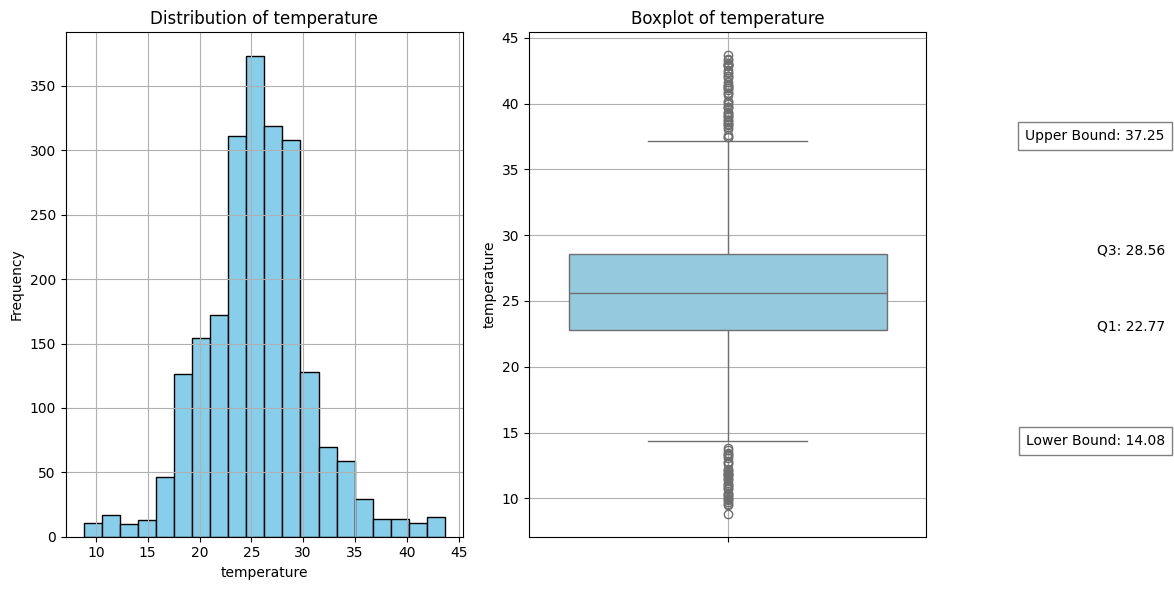

Statistics for temperature:

Max value: 43.68
Min value: 8.83
Mean: 25.62
Median: 25.60
Standard Deviation: 5.06
Range: 34.85
Number of outliers: 86 (3.91%)


In [12]:
univariate_analysis(df, 'temperature')

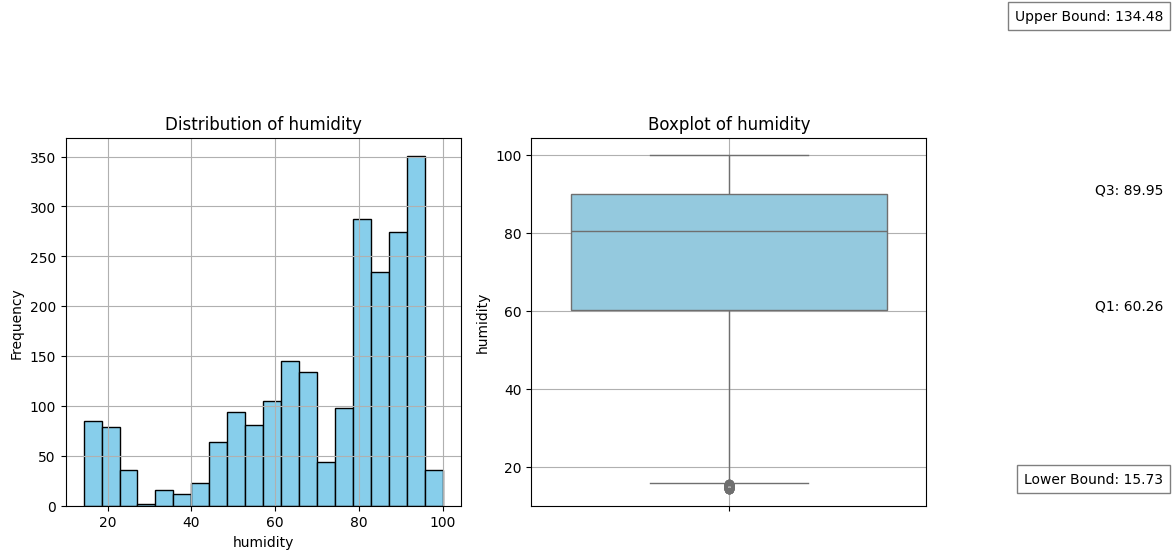

Statistics for humidity:

Max value: 99.98
Min value: 14.26
Mean: 71.48
Median: 80.47
Standard Deviation: 22.26
Range: 85.72
Number of outliers: 30 (1.36%)


In [13]:
univariate_analysis(df, 'humidity')

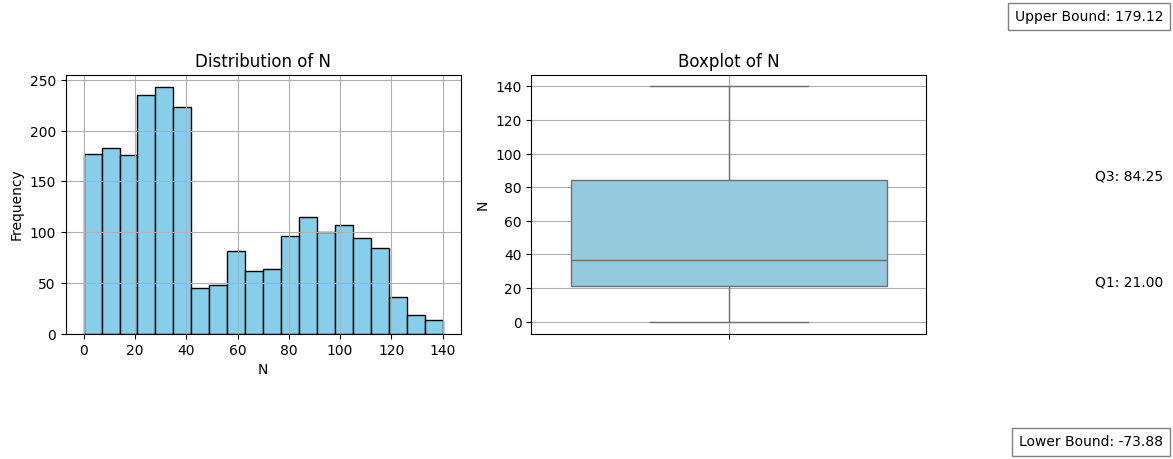

Statistics for N:

Max value: 140.00
Min value: 0.00
Mean: 50.55
Median: 37.00
Standard Deviation: 36.92
Range: 140.00
Number of outliers: 0 (0.00%)


In [14]:
univariate_analysis(df,"N") 

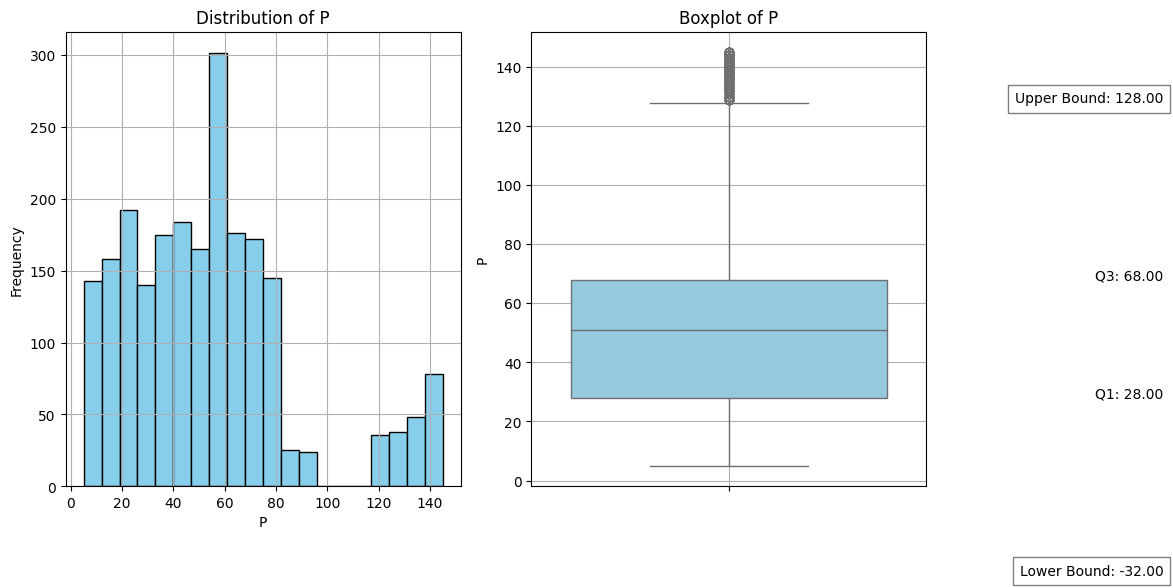

Statistics for P:

Max value: 145.00
Min value: 5.00
Mean: 53.36
Median: 51.00
Standard Deviation: 32.99
Range: 140.00
Number of outliers: 138 (6.27%)


In [15]:
univariate_analysis(df,"P") 

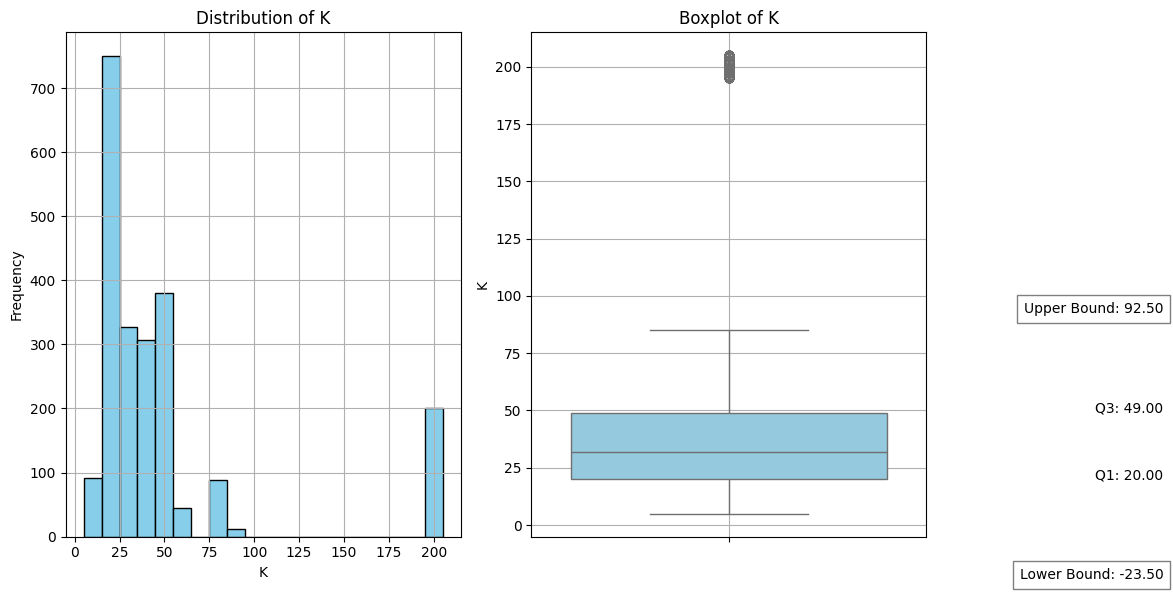

Statistics for K:

Max value: 205.00
Min value: 5.00
Mean: 48.15
Median: 32.00
Standard Deviation: 50.65
Range: 200.00
Number of outliers: 200 (9.09%)


In [16]:
univariate_analysis(df,"K") 

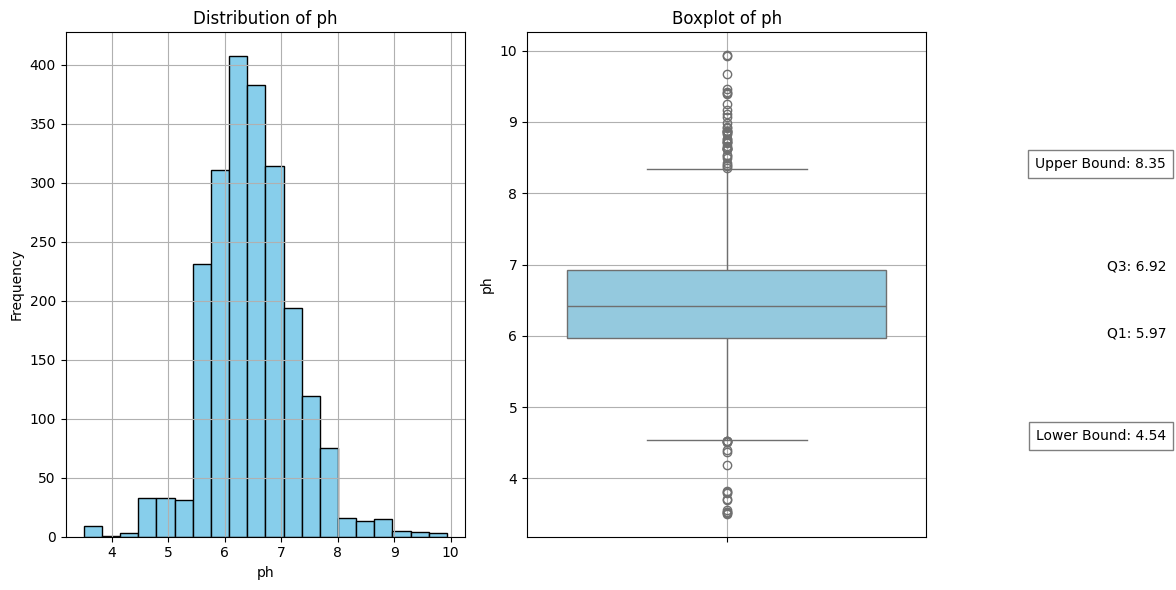

Statistics for ph:

Max value: 9.94
Min value: 3.50
Mean: 6.47
Median: 6.43
Standard Deviation: 0.77
Range: 6.43
Number of outliers: 57 (2.59%)


In [17]:
univariate_analysis(df,"ph") 

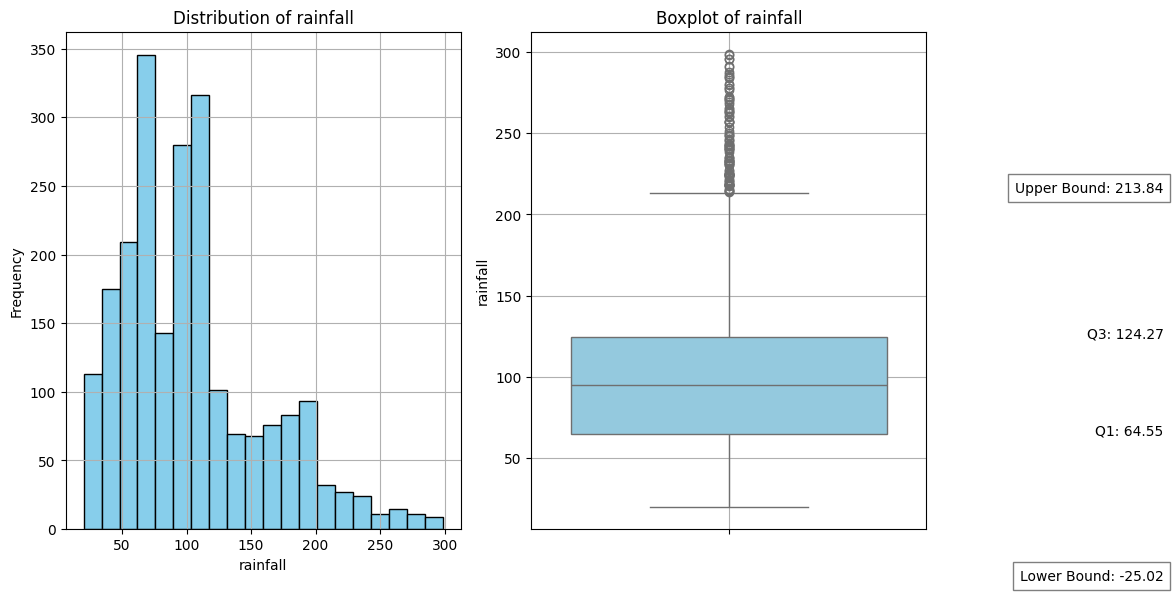

Statistics for rainfall:

Max value: 298.56
Min value: 20.21
Mean: 103.46
Median: 94.87
Standard Deviation: 54.96
Range: 278.35
Number of outliers: 100 (4.55%)


In [18]:
univariate_analysis(df,"rainfall")

C:\Users\HariharanSivakumar\AppData\Local\Temp\ipykernel_13132\1190484101.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


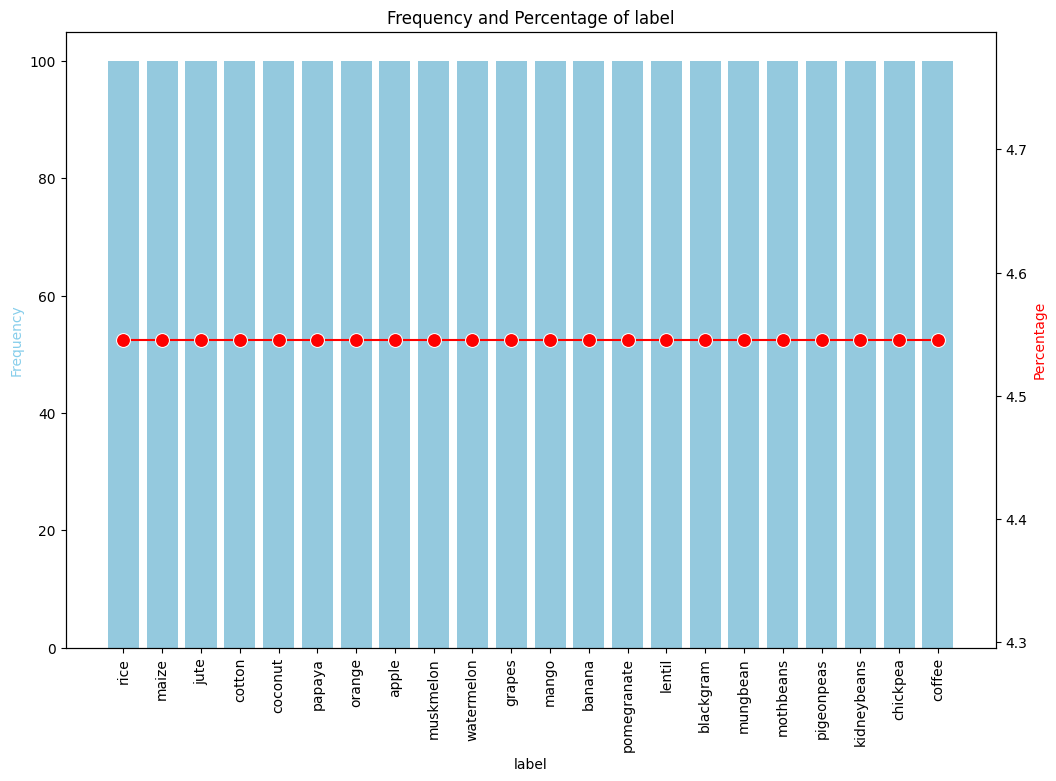

Frequency, Percentage, and Proportion Table:
label             rice       maize        jute      cotton     coconut  \
Frequency   100.000000  100.000000  100.000000  100.000000  100.000000   
Percentage    4.545455    4.545455    4.545455    4.545455    4.545455   
Proportion    0.045455    0.045455    0.045455    0.045455    0.045455   

label           papaya      orange       apple   muskmelon  watermelon  ...  \
Frequency   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
Percentage    4.545455    4.545455    4.545455    4.545455    4.545455  ...   
Proportion    0.045455    0.045455    0.045455    0.045455    0.045455  ...   

label           banana  pomegranate      lentil   blackgram    mungbean  \
Frequency   100.000000   100.000000  100.000000  100.000000  100.000000   
Percentage    4.545455     4.545455    4.545455    4.545455    4.545455   
Proportion    0.045455     0.045455    0.045455    0.045455    0.045455   

label        mothbeans  pigeonpeas  kidn

In [19]:
univariate_analysis(df, 'label')



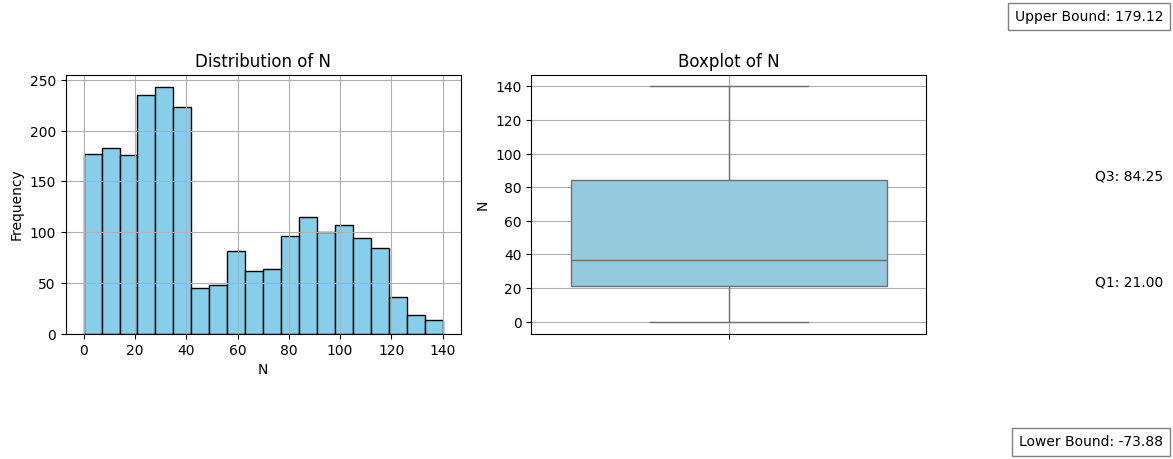

Statistics for N:

Max value: 140.00
Min value: 0.00
Mean: 50.55
Median: 37.00
Standard Deviation: 36.92
Range: 140.00
Number of outliers: 0 (0.00%)


In [22]:


# Assume 'data' is your DataFrame and 'feature' is the name of the feature
univariate_analysis(df, 'N')


In [32]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def continuous_impact_analysis(data, continuous_feature, target_feature, significance_level=0.05):
    """
    Perform ANOVA (Analysis of Variance) and Kruskal-Wallis test for a given continuous feature and target feature.
    Prints the results of the tests and indicates if the continuous feature has a significant impact on the target feature.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the dataset.
    continuous_feature (str): The name of the continuous feature.
    target_feature (str): The name of the target feature.
    significance_level (float): The significance level to use for the tests (default is 0.05).

    Returns:
    None
    """
    # ANOVA (Analysis of Variance)
    model = ols(f'{target_feature} ~ C({continuous_feature})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_statistic = anova_table["F"][0]
    p_value_anova = anova_table["PR(>F)"][0]
    
    print(f"ANOVA (Analysis of Variance) for {continuous_feature} and {target_feature}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value_anova}")
    if p_value_anova < significance_level:
        print(f"Result: The continuous feature '{continuous_feature}' has a significant impact on the categorical target '{target_feature}'.")
    else:
        print(f"Result: The continuous feature '{continuous_feature}' does not have a significant impact on the categorical target '{target_feature}'.")

    # Kruskal-Wallis test
    groups = [group[continuous_feature].values for name, group in data.groupby(target_feature)]
    h_statistic, p_value_kruskal = stats.kruskal(*groups)
    
    print(f"\nKruskal-Wallis test for {continuous_feature} and {target_feature}:")
    print(f"H-statistic: {h_statistic}")
    print(f"P-value: {p_value_kruskal}")
    if p_value_kruskal < significance_level:
        print(f"Result: The continuous feature '{continuous_feature}' has a significant impact on the categorical target '{target_feature}'.")
    else:
        print(f"Result: The continuous feature '{continuous_feature}' does not have a significant impact on the categorical target '{target_feature}'.")

# Example usage:
continuous_impact_analysis(df, 'N', 'label')


ValueError: endog has evaluated to an array with multiple columns that has shape (2200, 22). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

## bivariate

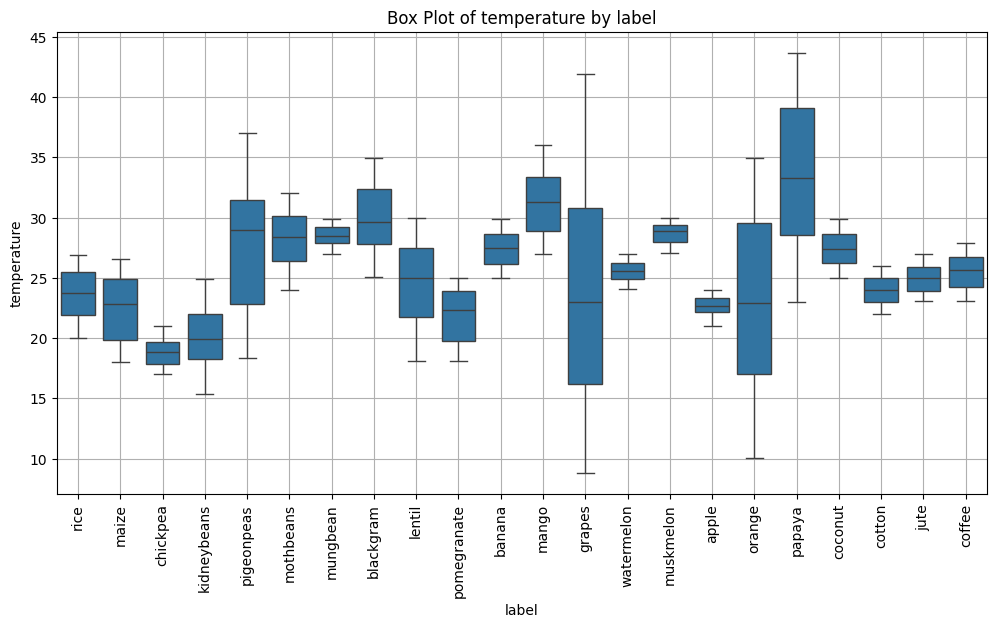

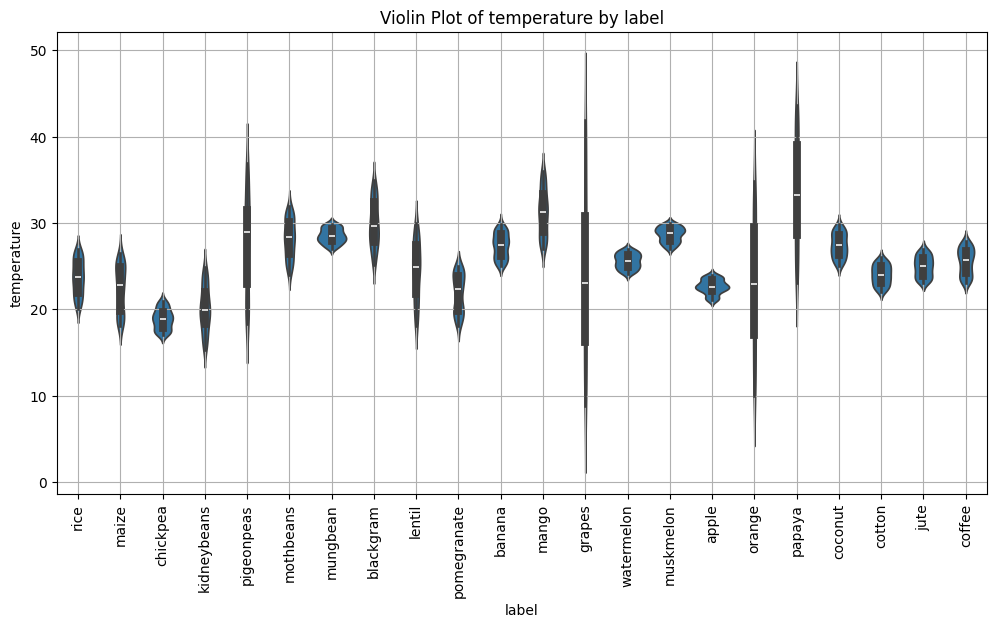

d:\hari\github\Crop-Recommendation\crop_recom_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\hari\github\Crop-Recommendation\crop_recom_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\hari\github\Crop-Recommendation\crop_recom_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\hari\github\Crop-Recommendation\crop_recom_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d

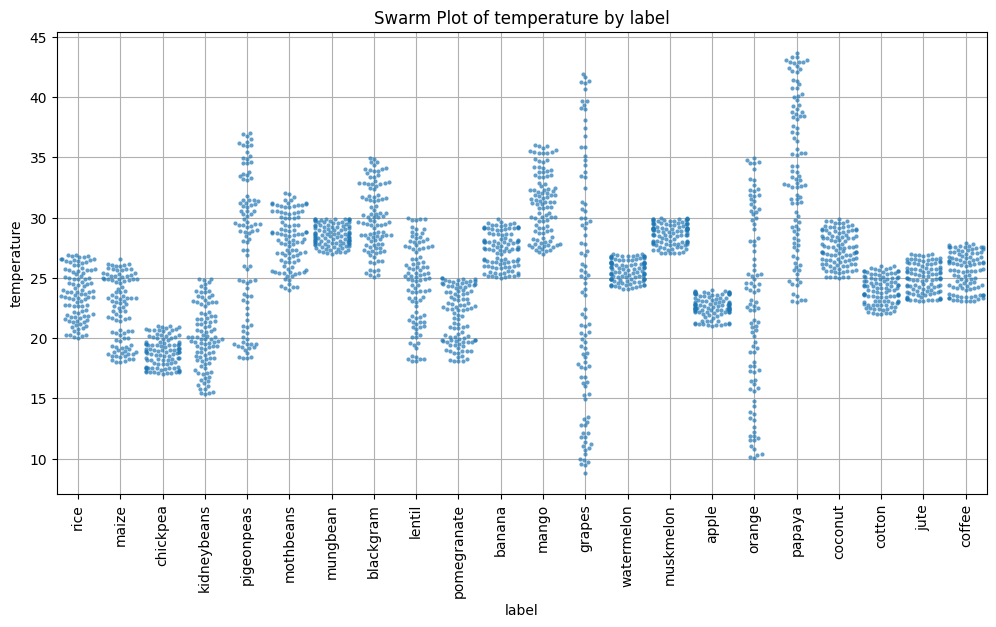

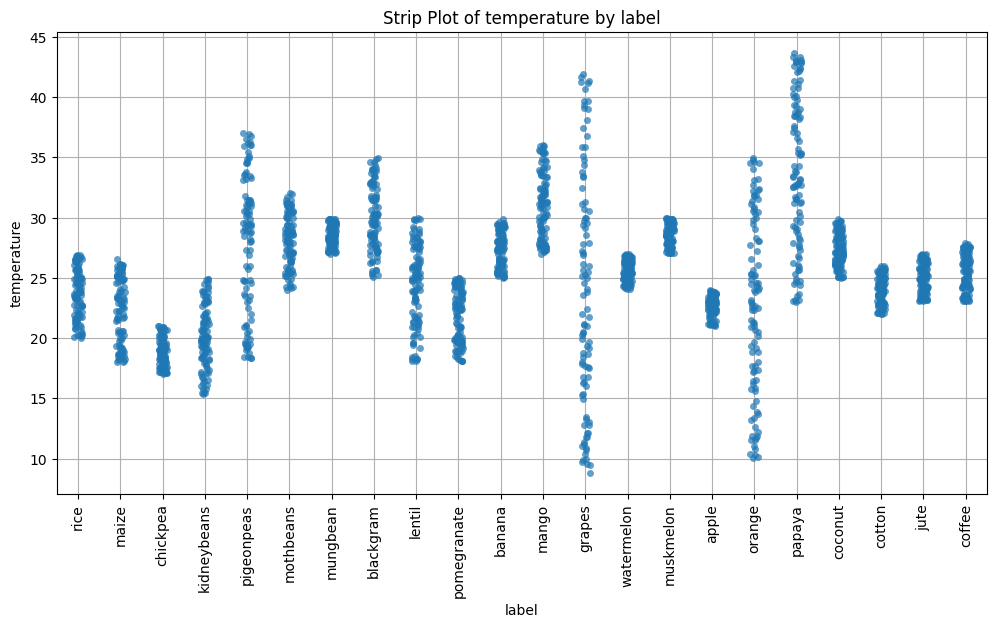

label       apple      banana   blackgram    chickpea     coconut      coffee  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    22.630942   27.376798   29.973340   18.872847   27.409892   25.540477   
std      0.827404    1.428359    2.686357    1.169838    1.385734    1.502635   
min     21.036527   25.010185   25.097374   17.024985   25.008724   23.059519   
25%     22.163206   26.108408   27.822763   17.877953   26.268718   24.218563   
50%     22.628290   27.443333   29.655515   18.878291   27.385317   25.656643   
75%     23.344066   28.657735   32.379701   19.711637   28.600213   26.744956   
max     23.996862   29.908885   34.946616   20.995022   29.869083   27.923744   

label      cotton      grapes        jute  kidneybeans  ...       mango  \
count  100.000000  100.000000  100.000000   100.000000  ...  100.000000   
mean    23.988958   23.849575   24.958376    20.115085  ...   31.208770   
std      1.135681    9.738649    1.185138    

In [28]:
bivariate_analysis_categorical(df, 'temperature', 'label')